# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [4]:
test_data[0]

'\nJust taking a guess, perhaps it was that Koresh had peaceably been served\nwith warrants before, and he did not shoot anyone but instead went with the\npolice without fighting.\n--\n"On the first day after Christmas my truelove served to me...  Leftover Turkey!\nOn the second day after Christmas my truelove served to me...  Turkey Casserole\n    that she made from Leftover Turkey.\n[days 3-4 deleted] ...  Flaming Turkey Wings! ...\n   -- Pizza Hut commercial (and M*tlu/A*gic bait)'

In [3]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(num_examples):
        print ("Example Number: " + str(i+1) + "\nCategory: " + categories[train_labels[i]] + 
               "\n" + train_data[i] + "\n\n")
### STUDENT END ###
P1()

Example Number: 1
Category: talk.religion.misc
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Example Number: 2
Category: sci.space


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil 

### Part 2:

Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [4]:
def P2():
### STUDENT START ###
# A.
# Size of the vocabulary
# initializing the CountVectorizer
    vector_size = CountVectorizer()
    train_matrix_1 = vector_size.fit_transform(train_data)
    print("A.\n" + "Size of the vocabulary: " + str(train_matrix_1.shape[1]))

    # Average number of non-zero features per example?
    # using nnz to get the number of non zeros from train_matrix_1, then divide by # of features
    non_zero_feat = train_matrix_1.nnz
    print("Average number of non-zero features per example: " + str(non_zero_feat / train_matrix_1.shape[0]))

    # What fraction of the entries in the matrix are non-zero?
    # using the same formula above, we just have to multiply denominator with number of vocabulary
    print("Fraction of the entries in the matrix are non-zero: " + 
          str(round(float(non_zero_feat / (train_matrix_1.shape[0] * train_matrix_1.shape[1])), 7)))

    # B. What are the 0th and last feature strings (in alphabetical order)?
    train_matrix_1b = vector_size.get_feature_names()
    print("\nB.\n" + "0th feature string: " + str(train_matrix_1b[0]))
    print("Last feature string: " + str(train_matrix_1b[-1]))

    # C. What's the average number of non-zero features per example?
    # Declaring our vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]
    my_vocab = ["atheism", "graphics", "space", "religion"]
    # Re-shaping our training vectors with the new vocab
    vector_vocab = CountVectorizer(vocabulary = my_vocab)
    train_matrix_2 = vector_vocab.fit_transform(train_data)
    non_zero_vocab = train_matrix_2.nnz
    print("\nC.\n" + "Average number of non-zero features per example for new vocab: " 
          + str(round(float(non_zero_vocab / train_matrix_2.shape[0]), 4)))

    # D. What size vocabulary does this yield?
    # using ngram_range = (2,2) and analyzer = 'char' for bigram
    vector_bigram = CountVectorizer(ngram_range = (2,2), analyzer = 'char')
    train_matrix_3 = vector_bigram.fit_transform(train_data)
    print("\nD.\n" + "Size of the vocab for bigram char features: " + str(train_matrix_3.shape[1]))

    # using ngram_range = (3,3) and analyzer = 'char' for trigram
    vector_trigram = CountVectorizer(ngram_range = (3,3), analyzer = 'char')
    train_matrix_4 = vector_trigram.fit_transform(train_data)
    print("Size of the vocab for trigram char features: " + str(train_matrix_4.shape[1]))

    # E. What size vocabulary does this yield?
    vector_min_df = CountVectorizer(min_df = 10)
    train_matrix_5 = vector_min_df.fit_transform(train_data)
    print("\nE.\n" + "Size of the vocab for that appear in fewer than 10 docs: " + str(train_matrix_5.shape[1]))

    # F. What fraction of the words in the dev data are missing from the vocabulary? 
    vector_dev = CountVectorizer()
    train_matrix_6 = vector_dev.fit_transform(dev_data)
    train_matrix_7 = vector_dev.get_feature_names()
    # setting up a loop to append all the missing items in dev from the vocabulary
    delta_dev_train = []
    for i in train_matrix_7:
        if i not in train_matrix_1b:
            delta_dev_train.append(i)
    # Dividing the length of missing vocab from dev by the size of vocabulary
    print("\nF.\n" + "What fraction of the words in the dev data are missing from the vocabulary: " + 
          str(round(len(delta_dev_train)/train_matrix_6.shape[1], 4)))

### STUDENT END ###
P2()

A.
Size of the vocabulary: 26879
Average number of non-zero features per example: 96.70599803343165
Fraction of the entries in the matrix are non-zero: 0.0035978

B.
0th feature string: 00
Last feature string: zyxel

C.
Average number of non-zero features per example for new vocab: 0.2684

D.
Size of the vocab for bigram char features: 3291
Size of the vocab for trigram char features: 32187

E.
Size of the vocab for that appear in fewer than 10 docs: 3064

F.
What fraction of the words in the dev data are missing from the vocabulary: 0.2479


### Part 3:

Use the default CountVectorizer options and report the f1 score (use metrics.f1_score with average="weighted") for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

* Why doesn't nearest neighbors work well for this problem?
* Any ideas why logistic regression doesn't work as well as Naive Bayes?
* Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [5]:
def P3():
### STUDENT START ###
 # knn model for part 3
    vector_part3 = CountVectorizer()
    train_matrix_8 = vector_part3.fit_transform(train_data)
    train_matrix_9 = vector_part3.transform(dev_data)
    pred_knn_best = 0
    for k in range(1,50):
        model_knn = KNeighborsClassifier(n_neighbors=k)
        model_knn.fit(train_matrix_8, train_labels)
        pred_knn = model_knn.predict(train_matrix_9)
        if metrics.f1_score(pred_knn, dev_labels, average = 'weighted') > pred_knn_best:
            pred_knn_best = metrics.f1_score(pred_knn, dev_labels, average = 'weighted')
            iterations = k
    print("Optimal K: " + str(iterations) + ", F1 Score: " + str(pred_knn_best))
    
 # Also fit a Multinomial Naive Bayes model and find the optimal value for alpha
    alphas = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
    pred_mnb_best = 0
    for i in alphas:
        model_mnb = MultinomialNB(alpha = i)
        model_mnb.fit(train_matrix_8, train_labels)
        pred_mnb = model_mnb.predict(train_matrix_9)
        if metrics.f1_score(pred_mnb, dev_labels, average = 'weighted') > pred_mnb_best:
            pred_mnb_best = metrics.f1_score(pred_mnb, dev_labels, average = 'weighted')
            optimal_alpha = i
    print("Optimal Alpha: " + str(optimal_alpha) + ", F1 Score: " + str(pred_mnb_best))

 # finding the best value of C for logreg
    str_c = [0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100, 500, 750, 1500]
    c_optimal = 0
    pred_lr_best = 0
    temp_list = []
    sq_coef = []
    for i in str_c:
        model_lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', multi_class = 'ovr', C = i)
        model_lr.fit(train_matrix_8, train_labels)
        pred_lr = model_lr.predict(train_matrix_9)
        f1_logreg = metrics.f1_score(pred_lr, dev_labels, average = 'weighted')
        if f1_logreg > pred_lr_best:
            c_optimal = i
            pred_lr_best = f1_logreg

    print("Optimal C: " + str(c_optimal) + ", F1 Score: " + str(pred_lr_best))
    
 # sum of squared weights   
    for i in str_c:
        model_lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', multi_class = 'ovr', C = i)
        model_lr.fit(train_matrix_8, train_labels)
        pred_lr = model_lr.predict(train_matrix_9)
        temp_list.append(model_lr.coef_)

    for j in range(len(temp_list)):
        print("c: ", str_c[j], "| sum of weights^2: ", np.sum(np.square(temp_list[j]), axis=1))
### STUDENT END ###
P3()

Optimal K: 42, F1 Score: 0.47168321681626313
Optimal Alpha: 0.1, F1 Score: 0.7954935780581611
Optimal C: 0.1, F1 Score: 0.7116596694267557
c:  0.001 | sum of weights^2:  [0.16509345 0.20095275 0.18067094 0.18724278]
c:  0.01 | sum of weights^2:  [2.54147847 2.93970937 2.86246884 2.25002921]
c:  0.1 | sum of weights^2:  [27.12949733 24.65904426 27.45774154 23.02605311]
c:  1 | sum of weights^2:  [166.98390599 130.90932402 157.94489671 145.73682998]
c:  5 | sum of weights^2:  [423.33356193 322.91365009 389.90295775 377.98212759]
c:  10 | sum of weights^2:  [586.13543478 448.1432137  539.25218447 530.94426706]
c:  25 | sum of weights^2:  [859.08048589 660.39199872 790.6505442  790.92941688]
c:  50 | sum of weights^2:  [1111.01588363  855.70467482 1022.07766283 1033.89157401]
c:  100 | sum of weights^2:  [1404.3356582  1081.87307064 1269.03854414 1315.24714935]
c:  500 | sum of weights^2:  [2278.3703046  1713.57673548 2087.21359804 2132.16172002]
c:  750 | sum of weights^2:  [2559.35211177

ANSWER:

* Why doesn't nearest neighbors work well for this problem?
  
  We're dealing with a feature size that's greater than 2,000. That is a lot of features and more complexity is introduced with more features/dimensions. Unless we dramatically reduce the size of the features, nearest neighbors would not work well for this problem
  
* Any ideas why logistic regression doesn't work as well as Naive Bayes?

  The difference between Naive Bayes and logistic regression is that Naive Bayes assumes independence amongst features while logistic regression looks for relationships between features. Since we're dealing with more than 2,000 features, the logistic regression will perform badly due to complexity. If we want to improve the performance of our logistic regression model, we must reduce the number of features
    

* Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

  In the table above, as the C value started increasing from 0.001 to 1500, the sum of squared weights increased as well. Large C values allow large parameter values, which will end up being magnified when squared and summed up. High weights may lead to the issue of overfitting, therefore different c values should be used with caution

### Part 4:

Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [6]:
import pandas as pd

In [7]:
def P4():
### STUDENT START ###
    ## Unigram Logistic Regression
    # Creating vectors for unigram features
    vector_part4a = CountVectorizer()
    train_matrix_10 = vector_part4a.fit_transform(train_data)
    train_matrix_11 = vector_part4a.transform(dev_data)
    
    # Logistic Regression Model
    model_part4a = LogisticRegression(penalty = 'l2',solver = 'liblinear', multi_class = 'ovr', C = 0.1)
    model_part4a.fit(train_matrix_10, train_labels)
    pred_uni = model_part4a.predict(train_matrix_11)
    
    # Storing the coefficients in a dataframe
    df = pd.DataFrame(data = model_part4a.coef_, index = newsgroups_train.target_names, columns = vector_part4a.get_feature_names())
    # Transposing the dataframe for better view
    transposed_df = df.T
    # Collecting the top 5 words for all features
    top_df = transposed_df.sort_values(newsgroups_train.target_names[0], ascending = False).head(5)
    for i in range(1,4):
        temp_df = transposed_df.sort_values(newsgroups_train.target_names[i], ascending = False).head(5)
        top_df = top_df.append(temp_df)
    
    ## Bigram Logistic Regression
    # Re-creating vectors for bigram features
    vector_part4b = CountVectorizer(analyzer = 'word', ngram_range = (2,2))
    train_matrix_12 = vector_part4b.fit_transform(train_data)
    train_matrix_13 = vector_part4b.transform(dev_data)
    
    # Logistic Regression Model
    model_part4b = LogisticRegression(penalty = 'l2',solver = 'liblinear', multi_class = 'ovr', C = 0.1)
    model_part4b.fit(train_matrix_12, train_labels)
    pred_bi = model_part4b.predict(train_matrix_13)
    
    # Storing the coefficients in a dataframe
    df2 = pd.DataFrame(data = model_part4b.coef_, index = newsgroups_train.target_names, columns = vector_part4b.get_feature_names())
    # Transposing the dataframe for better view
    transposed_df2 = df2.T
    # Collecting the top 5 words for all features
    top_df_bi = transposed_df2.sort_values(newsgroups_train.target_names[0], ascending = False).head(5)
    for k in range(1,4):
        temp_df_bi = transposed_df2.sort_values(newsgroups_train.target_names[k], ascending = False).head(5)
        top_df_bi = top_df_bi.append(temp_df_bi)
    
    print("Weights for Unigram Features\n", top_df, "\n\nWeights for Bigram Features\n", top_df_bi)
    

    
### STUDENT END ###
P4()

Weights for Unigram Features
             alt.atheism  comp.graphics  sci.space  talk.religion.misc
atheism        0.495444      -0.207262  -0.199913           -0.267782
religion       0.493972      -0.298789  -0.393236            0.003912
bobby          0.478151      -0.120397  -0.167834           -0.227826
atheists       0.461330      -0.079416  -0.158385           -0.295281
islam          0.426283      -0.084818  -0.165049           -0.164898
graphics      -0.411138       1.007544  -0.651119           -0.372245
image         -0.263573       0.642081  -0.367632           -0.216177
file          -0.177353       0.641221  -0.421586           -0.288284
computer      -0.039770       0.558989  -0.329038           -0.228708
3d            -0.181984       0.546999  -0.311629           -0.181435
space         -0.655174      -0.714099   1.258760           -0.590278
orbit         -0.217564      -0.334085   0.597341           -0.248951
nasa          -0.273449      -0.261763   0.540867           

ANSWER:

Some odd features with heavy weights that caught my eye were (bobby) in [alt.atheism], (blood, fbi) in [talk.religion.misc]for the unigram feature models. For the bigram feature models, (cheers kent) had heavy weights in both [alt.atheism and talk.religion.misc]. This was a bit interesting, but after seeing some letter type correspondence documents from the first 5 examples of our dataset, I'm going to assume that "cheers kent" is the ending of many correspondence for many letter format documents. Therefore, it's understandable that "kent" or "cheers kent" could have high weights in our output. Validation and further data manipulation is required to improve this logistic regression model.

### Part 5:

Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [8]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    # all lower case
    s1 = s.lower()
    # only words
    s2 = re.sub("[^a-zA-Z]", " ", s1)
    # removing short words
    s3 = re.sub(r"\b[\w']{1,2}\b", " ", s2)
    return s3
### STUDENT END ###

def P5():
### STUDENT START ###
# Running with empty preprocessor
    vector_part5 = CountVectorizer()
    train_matrix_14 = vector_part5.fit_transform(train_data)
    train_matrix_15 = vector_part5.transform(dev_data)
    
    # Logistic Regression Model
    model_part5 = LogisticRegression(penalty = 'l2',solver = 'liblinear', multi_class = 'ovr', C = 0.1)
    model_part5.fit(train_matrix_14, train_labels)
    pred_p5 = model_part5.predict(train_matrix_15)
    f1_p5 = metrics.f1_score(pred_p5, dev_labels, average = 'weighted')
    print("F1 Score of no preprocessing: ", f1_p5)

# Running with better preprocessor
    vector_part5b = CountVectorizer(preprocessor = better_preprocessor)
    train_matrix_16 = vector_part5b.fit_transform(train_data)
    train_matrix_17 = vector_part5b.transform(dev_data)
    
    # Logistic Regression Model
    model_part5b = LogisticRegression(penalty = 'l2',solver = 'liblinear', multi_class = 'ovr', C = 0.1)
    model_part5b.fit(train_matrix_16, train_labels)
    pred_p5b = model_part5b.predict(train_matrix_17)
    f1_p5b = metrics.f1_score(pred_p5b, dev_labels, average = 'weighted')
    print("F1 Score with preprocessing: ", f1_p5b)
    
    # Reduction of vocab
    print("Number of features reduced by preprocessing: ", train_matrix_14.shape[1] - train_matrix_16.shape[1])
    print("Score Improvement: ", (f1_p5b - f1_p5)*100)
### STUDENT END ###
P5()

F1 Score of no preprocessing:  0.7116596694267557
F1 Score with preprocessing:  0.7238484232455749
Number of features reduced by preprocessing:  3277
Score Improvement:  1.218875381881912


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

When C:  0.001 
# of Non-Zero Weights for L1 are:  5
# of Non-Zero Weights for L2 are:  107516 

When C:  0.01 
# of Non-Zero Weights for L1 are:  38
# of Non-Zero Weights for L2 are:  107516 

When C:  0.1 
# of Non-Zero Weights for L1 are:  374
# of Non-Zero Weights for L2 are:  107516 

When C:  1 
# of Non-Zero Weights for L1 are:  1974
# of Non-Zero Weights for L2 are:  107516 

When C:  5 
# of Non-Zero Weights for L1 are:  5585
# of Non-Zero Weights for L2 are:  107516 

When C:  10 
# of Non-Zero Weights for L1 are:  6601
# of Non-Zero Weights for L2 are:  107516 

When C:  25 
# of Non-Zero Weights for L1 are:  9604
# of Non-Zero Weights for L2 are:  107516 

When C:  50 
# of Non-Zero Weights for L1 are:  13759
# of Non-Zero Weights for L2 are:  107516 

When C:  100 
# of Non-Zero Weights for L1 are:  18553
# of Non-Zero Weights for L2 are:  107516 

When C:  500 
# of Non-Zero Weights for L1 are:  56814
# of Non-Zero Weights for L2 are:  107516 

When C:  750 
# of Non-Zero

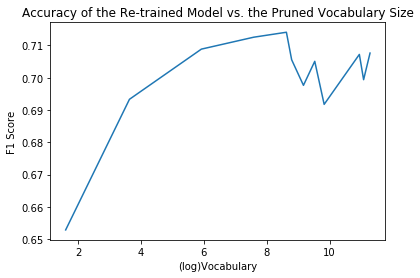

In [10]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    str_c = [0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100, 500, 750, 1500]
    new_list = []
    x_axis = []
    y_axis = []
    vector_part6a = CountVectorizer()
    train_matrix_18 = vector_part6a.fit_transform(train_data)
    train_matrix_19 = vector_part6a.transform(dev_data)
    
    for i in str_c:
        # Logistic Regression Model with L1 Penalty
        model_part6a = LogisticRegression(penalty = 'l1',solver = 'liblinear', multi_class = 'ovr', 
                                          C = i, tol = .015)
        model_part6a.fit(train_matrix_18, train_labels)
        x_axis.append(np.count_nonzero(model_part6a.coef_))
        print("When C: ", i, "\n# of Non-Zero Weights for L1 are: ", np.count_nonzero(model_part6a.coef_))
        # Logistic Regression Model with L2 Penalty
        model_part6b = LogisticRegression(penalty = 'l2',solver = 'liblinear', multi_class = 'ovr', 
                                          C = i, tol = .015)
        model_part6b.fit(train_matrix_18, train_labels)
        print("# of Non-Zero Weights for L2 are: ", np.count_nonzero(model_part6b.coef_),"\n")
    
    # reducing the size of vocab
    p6_coef = model_part6a.coef_
    p6_feature_names = vector_part6a.get_feature_names()
    save1 = np.nonzero(p6_coef)[0]
    save2 = np.nonzero(p6_coef)[1]
    p6_non_zero = np.array([save1,save2])
    for ii in p6_non_zero[1]:
        new_list.append(p6_feature_names[ii])
    
    # retraining the L2 model with new_list
    unique_new_list = np.unique(new_list)
    vector_part6b = CountVectorizer(vocabulary = unique_new_list)
    train_matrix_20 = vector_part6b.fit_transform(train_data)
    train_matrix_21 = vector_part6b.transform(dev_data)
    
    # storing the f1 scores for plotting
    for iii in str_c:
        model_part6b = LogisticRegression(penalty = 'l2',solver = 'liblinear', multi_class = 'ovr', 
                                          C = iii, tol = .015)
        model_part6b.fit(train_matrix_20, train_labels)
        p6_pred = model_part6b.predict(train_matrix_21)
        y_axis.append(metrics.f1_score(p6_pred, dev_labels, average = "weighted"))
    
    # plotting 
    plt.plot(np.log(x_axis), y_axis)
    plt.title('Accuracy of the Re-trained Model vs. the Pruned Vocabulary Size')
    plt.xlabel("(log)Vocabulary")
    plt.ylabel("F1 Score")
    plt.show()
    
    ### STUDENT END ###
P6()

### Part 7:

Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [12]:
def P7():
### STUDENT START ###
    correct_prob = []
    vector_part7 = TfidfVectorizer()
    train_matrix_22 = vector_part7.fit_transform(train_data)
    train_matrix_23 = vector_part7.transform(dev_data)

    model_part7 = LogisticRegression(penalty = 'l2', C = 100, solver = 'liblinear', multi_class = 'ovr')
    model_part7.fit(train_matrix_22, train_labels)
    pred_p7 = model_part7.predict(train_matrix_23)
    f1_p7 = metrics.f1_score(pred_p7, dev_labels, average = 'weighted')

    # ratio R: maximum predicted probability / predicted probability of the correct label
    # maximum predicted probability
    p7_prob = model_part7.predict_proba(train_matrix_23)
    max_p7_prob = np.max(p7_prob, axis=1) # returning the max of each row

    # predicted prob. of the correct label
    for i in range(len(max_p7_prob)):
        #correct_prob.append(p7_prob[i, dev_labels[i]])
        correct_prob.append(max_p7_prob[i]/p7_prob[i, dev_labels[i]])

    # grabbing the indicies of the highest 3 R scores
    correct_array = np.array(correct_prob)
    highr_3 = (-correct_array).argsort()[:3]

    for ii in highr_3:
        print("Ratio R", correct_array[ii])
        print("Actual: ", newsgroups_train.target_names[dev_labels[ii]])
        print("Predicted: ", newsgroups_train.target_names[pred_p7[ii]])
        print(dev_data[ii],"\n----------------------------")

## STUDENT END ###
P7()

Ratio R 929.357964497737
Actual:  talk.religion.misc
Predicted:  comp.graphics
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use of this book.

ANSWER: When looking at the top 3 examples with highest R ratio, the top 2 examples both incorrectly predicted "comp.graphics". Upon further reviewing the actual examples, these are actually tough! The first example is from "talk.religion.misc", but the actual content of the example is very technical description of a religious document. The text contains a lot of technical acronyms and words like [RTF, FTP, print, ASCII] and more. Upon reviewing the 2nd example, it is clear that the word "FTP" has a heavy weight that influences the prediction of the algorithm. Perhaps pre-processing the word FTP with different methods before fitting the models could help improve the prediction. 

### Part 8 EXTRA CREDIT:

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.